## Electric Vehicle Data Analysis (Project 1_UCI_DABC)

![](https://static01.nyt.com/images/2021/05/15/business/00electric-cars/00electric-cars-videoSixteenByNine3000.jpg)

- Mainstream electic vehicles (EV) generally include electric motored powered propulstion system(s) that are powered by a collector system(s), and/or creating electricity throught the process of converting fossil fuel (Wikipedia, 2023).
- Internal combustion engines were the dominant propulsion method for cars and trucks for approximately 100 years; however, this data analysis exploration suggest that electric powered vehicles are trending to supercede fossil fule powered vehicles.

### PROJECT OUTINE

- Import libraries and their dependencies
- Read in the datasets
- Data preparation and sanitizaion
- Exploritory data analysis
- Ask and solve questions to form a hypothesis
- Plot techniques to illustrate the dataset(s) for visualization

## About the Dataset
The dataset utilized is vehicle registration data from the Department of Transportion. The dataset is all-inclusive of non-electric powered vehicles, and EVs (Battery Electric Vehicles (BEVs), Plug-in Hybrid Electric Vehicles (PHEVs), and Hybrid Electric Vehicles (HEVs)).

The registration data is from 2016 through 2022. Through the analyis of year on year (YoY) statistics, the dataset does suggest there is a clear shift in the demand slope of EVs compared to fossil fuel vehicles.

We have answered below questions to generate insights from the dataset
*   What is the average range improvements by year per electric charge?
*   What is the year on year registration's growth for EV?
*   What is the Top 10 count of registrations per state?
*   What is the EVT Distribution count per state?
*   In which year did EV registrations increase the most?

## Importing | Packages and Libraries

In [1]:
# Setup
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import hvplot.pandas
# import gmaps
import plotly.express as px

# Data files
registration_data_combined = "../Registration_Files/Combined_Registrations.csv"
fuel_stations = "../Registration_Files/ele_fuel_stations (Aug 7 2023).csv"
EV_Prices = "../Registration_Files/2022_EV_Prices.csv" 
zipcodes = "../Registration_Files/zip_code_database.csv"


## Data Analysis | Steps
* Select the real-world data set
* Convert dataset into a Pandas DataFrame
* Perform data sanatization with missing values using Pandas and NumPy
* Plot interactive graphs to understand the data using visual libraries like Plotly
* Ask and Answer interesting questions from the dataset
* Summarize your key inferences and state the conclusion
* Elaborate on ideas for future work and quote references

## Step 1: Download the dataset

In [2]:
#Read in
registration_data_df = pd.read_csv(registration_data_combined)
registration_data_df

,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel
0,2022,Alabama,8700,4400,50800,48100,449800,100,100,0,0,4077100,126100,30300
1,2022,Alaska,2000,700,9000,8700,48600,0,0,0,0,457100,30500,5500
2,2022,Arizona,65800,20400,150800,61200,446000,600,800,0,0,5476100,198700,70100
3,2022,Arkansas,5100,2500,30600,33300,283900,200,0,0,0,2229500,89700,10600
4,2022,California,903600,361100,1514000,183900,1338000,10300,1500,14900,0,31059000,725300,8200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021,Washington,66800,24300,240000,59000,359700,600,100,0,0,5792000,283600,64400
360,2021,West Virginia,1000,1000,14500,13900,129800,200,0,0,0,1268300,46100,10900
361,2021,Wisconsin,9300,7700,93500,39800,556500,700,100,0,0,4639100,143300,29900
362,2021,Wyoming,500,400,5700,17100,59400,100,0,0,0,482400,62100,15600


## Step 2: Perform data preparation & cleaning

## Dataset | Unique signatures to identify which columns to leverage

In [3]:
cols = registration_data_df.columns
def Unique_Values():
    for i in np.arange(0,len(cols)):
        print('There are {} nos of unique values in {} column out of {}'.format(registration_data_df[cols[i]].nunique(), cols[i], len(registration_data_df)))
Unique_Values()

There are 7 nos of unique values in Year column out of 364
There are 52 nos of unique values in State column out of 364
There are 194 nos of unique values in Electric (EV) column out of 364
There are 157 nos of unique values in Plug-In Hybrid Electric (PHEV) column out of 364
There are 333 nos of unique values in Hybrid Electric (HEV) column out of 364
There are 103 nos of unique values in Biodiesel column out of 364
There are 356 nos of unique values in Ethanol/Flex (E85) column out of 364
There are 174 nos of unique values in Compressed Natural Gas (CNG) column out of 364
There are 13 nos of unique values in Propane column out of 364
There are 11 nos of unique values in Hydrogen column out of 364
There are 5 nos of unique values in Methanol column out of 364
There are 360 nos of unique values in Gasoline column out of 364
There are 341 nos of unique values in Diesel column out of 364
There are 314 nos of unique values in Unknown Fuel column out of 364


In [4]:
registration_data_df.info

<bound method DataFrame.info of      Year          State  Electric (EV)  Plug-In Hybrid Electric (PHEV)  \
0    2022        Alabama           8700                            4400   
1    2022         Alaska           2000                             700   
2    2022        Arizona          65800                           20400   
3    2022       Arkansas           5100                            2500   
4    2022     California         903600                          361100   
..    ...            ...            ...                             ...   
359  2021     Washington          66800                           24300   
360  2021  West Virginia           1000                            1000   
361  2021      Wisconsin           9300                            7700   
362  2021        Wyoming            500                             400   
363  2021  United States        1454400                          786800   

     Hybrid Electric (HEV)  Biodiesel  Ethanol/Flex (E85)  \
0     

## Step 3: Analysis
After the preparing the data, analyze it with the help of NumPy and Pandas. Use describe() to get the count, mean value, standard deviation, minimum and maximum values

With the use of Pandas and/or Numpy, begin to conduct exploritory analysis of the prepped dataset. Starting analysis to get the count, mean, and std.deviation values to help drive direction out of the nebulas to form solid questions/hypotheses. 

In [5]:
#sum columns
total_registrations = registration_data_df[['Electric (EV)', 
    'Plug-In Hybrid Electric (PHEV)', 
    'Hybrid Electric (HEV)', 
    'Biodiesel', 
    'Ethanol/Flex (E85)', 
    'Compressed Natural Gas (CNG)', 
    'Propane',
    'Hydrogen',
    'Methanol',
    'Gasoline',
    'Diesel',
    'Unknown Fuel']].sum()

total_registrations

Electric (EV)                       13858400
Plug-In Hybrid Electric (PHEV)       7980200
Hybrid Electric (HEV)               66260400
Biodiesel                            9440400
Ethanol/Flex (E85)                 341447800
Compressed Natural Gas (CNG)         6285200
Propane                                28400
Hydrogen                              135200
Methanol                                3800
Gasoline                          3253536600
Diesel                             111616400
Unknown Fuel                        34279600
dtype: int64

In [6]:
# Dataframe
registration_data_df

,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel
0,2022,Alabama,8700,4400,50800,48100,449800,100,100,0,0,4077100,126100,30300
1,2022,Alaska,2000,700,9000,8700,48600,0,0,0,0,457100,30500,5500
2,2022,Arizona,65800,20400,150800,61200,446000,600,800,0,0,5476100,198700,70100
3,2022,Arkansas,5100,2500,30600,33300,283900,200,0,0,0,2229500,89700,10600
4,2022,California,903600,361100,1514000,183900,1338000,10300,1500,14900,0,31059000,725300,8200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021,Washington,66800,24300,240000,59000,359700,600,100,0,0,5792000,283600,64400
360,2021,West Virginia,1000,1000,14500,13900,129800,200,0,0,0,1268300,46100,10900
361,2021,Wisconsin,9300,7700,93500,39800,556500,700,100,0,0,4639100,143300,29900
362,2021,Wyoming,500,400,5700,17100,59400,100,0,0,0,482400,62100,15600


In [7]:
#add new columns for EV registration rate
registration_data_df["Total Registrations"] = registration_data_df.sum(axis=1)
registration_data_df

,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel,Total Registrations
0,2022,Alabama,8700,4400,50800,48100,449800,100,100,0,0,4077100,126100,30300,4797522
1,2022,Alaska,2000,700,9000,8700,48600,0,0,0,0,457100,30500,5500,564122
2,2022,Arizona,65800,20400,150800,61200,446000,600,800,0,0,5476100,198700,70100,6492522
3,2022,Arkansas,5100,2500,30600,33300,283900,200,0,0,0,2229500,89700,10600,2687422
4,2022,California,903600,361100,1514000,183900,1338000,10300,1500,14900,0,31059000,725300,8200,36121822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021,Washington,66800,24300,240000,59000,359700,600,100,0,0,5792000,283600,64400,6892521
360,2021,West Virginia,1000,1000,14500,13900,129800,200,0,0,0,1268300,46100,10900,1487721
361,2021,Wisconsin,9300,7700,93500,39800,556500,700,100,0,0,4639100,143300,29900,5521921
362,2021,Wyoming,500,400,5700,17100,59400,100,0,0,0,482400,62100,15600,645321


In [8]:
# Add new columns for registration rate
registration_data_df["Total EV Registrations"] = registration_data_df[['Electric (EV)', 
    'Plug-In Hybrid Electric (PHEV)', 
    'Hybrid Electric (HEV)']].sum(axis=1)

registration_data_df["Total Gasoline/Diesel Registrations"] = registration_data_df[['Gasoline', 
    'Diesel']].sum(axis=1)

registration_data_df

,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel,Total Registrations,Total EV Registrations,Total Gasoline/Diesel Registrations
0,2022,Alabama,8700,4400,50800,48100,449800,100,100,0,0,4077100,126100,30300,4797522,63900,4203200
1,2022,Alaska,2000,700,9000,8700,48600,0,0,0,0,457100,30500,5500,564122,11700,487600
2,2022,Arizona,65800,20400,150800,61200,446000,600,800,0,0,5476100,198700,70100,6492522,237000,5674800
3,2022,Arkansas,5100,2500,30600,33300,283900,200,0,0,0,2229500,89700,10600,2687422,38200,2319200
4,2022,California,903600,361100,1514000,183900,1338000,10300,1500,14900,0,31059000,725300,8200,36121822,2778700,31784300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021,Washington,66800,24300,240000,59000,359700,600,100,0,0,5792000,283600,64400,6892521,331100,6075600
360,2021,West Virginia,1000,1000,14500,13900,129800,200,0,0,0,1268300,46100,10900,1487721,16500,1314400
361,2021,Wisconsin,9300,7700,93500,39800,556500,700,100,0,0,4639100,143300,29900,5521921,110500,4782400
362,2021,Wyoming,500,400,5700,17100,59400,100,0,0,0,482400,62100,15600,645321,6600,544500


In [9]:
# Add new columns for final rate
registration_data_df["EV Registration Rate %"] = registration_data_df['Total EV Registrations'] / registration_data_df['Total Registrations'] * 100
registration_data_df["Gas/Diesel Registration Rate %"] = registration_data_df['Total Gasoline/Diesel Registrations'] / registration_data_df['Total Registrations'] * 100

registration_data_df

,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel,Total Registrations,Total EV Registrations,Total Gasoline/Diesel Registrations,EV Registration Rate %,Gas/Diesel Registration Rate %
0,2022,Alabama,8700,4400,50800,48100,449800,100,100,0,0,4077100,126100,30300,4797522,63900,4203200,1.331938,87.611896
1,2022,Alaska,2000,700,9000,8700,48600,0,0,0,0,457100,30500,5500,564122,11700,487600,2.074019,86.435204
2,2022,Arizona,65800,20400,150800,61200,446000,600,800,0,0,5476100,198700,70100,6492522,237000,5674800,3.650353,87.405172
3,2022,Arkansas,5100,2500,30600,33300,283900,200,0,0,0,2229500,89700,10600,2687422,38200,2319200,1.421437,86.298319
4,2022,California,903600,361100,1514000,183900,1338000,10300,1500,14900,0,31059000,725300,8200,36121822,2778700,31784300,7.692580,87.991962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021,Washington,66800,24300,240000,59000,359700,600,100,0,0,5792000,283600,64400,6892521,331100,6075600,4.803758,88.147718
360,2021,West Virginia,1000,1000,14500,13900,129800,200,0,0,0,1268300,46100,10900,1487721,16500,1314400,1.109079,88.349899
361,2021,Wisconsin,9300,7700,93500,39800,556500,700,100,0,0,4639100,143300,29900,5521921,110500,4782400,2.001115,86.607541
362,2021,Wyoming,500,400,5700,17100,59400,100,0,0,0,482400,62100,15600,645321,6600,544500,1.022747,84.376613


In [10]:
#Reducing the len of the df
reduced_registration_data_df = registration_data_df[[
    "Year",
    "State",	
    "Electric (EV)",	
    "Plug-In Hybrid Electric (PHEV)",
    "Hybrid Electric (HEV)",
    "Gasoline",	
    "Diesel",	
    "Total Registrations",	
    "Total EV Registrations",	
    "Total Gasoline/Diesel Registrations",	
    "EV Registration Rate %",	
    "Gas/Diesel Registration Rate %"]]

reduced_registration_data_df


,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Gasoline,Diesel,Total Registrations,Total EV Registrations,Total Gasoline/Diesel Registrations,EV Registration Rate %,Gas/Diesel Registration Rate %
0,2022,Alabama,8700,4400,50800,4077100,126100,4797522,63900,4203200,1.331938,87.611896
1,2022,Alaska,2000,700,9000,457100,30500,564122,11700,487600,2.074019,86.435204
2,2022,Arizona,65800,20400,150800,5476100,198700,6492522,237000,5674800,3.650353,87.405172
3,2022,Arkansas,5100,2500,30600,2229500,89700,2687422,38200,2319200,1.421437,86.298319
4,2022,California,903600,361100,1514000,31059000,725300,36121822,2778700,31784300,7.692580,87.991962
...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021,Washington,66800,24300,240000,5792000,283600,6892521,331100,6075600,4.803758,88.147718
360,2021,West Virginia,1000,1000,14500,1268300,46100,1487721,16500,1314400,1.109079,88.349899
361,2021,Wisconsin,9300,7700,93500,4639100,143300,5521921,110500,4782400,2.001115,86.607541
362,2021,Wyoming,500,400,5700,482400,62100,645321,6600,544500,1.022747,84.376613


In [11]:
#EVs bar plot showing the total number of rows using pyplot.
ev_sum = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["Year"]).sum()
ev_mean = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["Year"]).mean()
ev_median = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["Year"]).median()
ev_var = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["Year"]).var()
ev_std = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["Year"]).std()
ev_sem = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["Year"]).sem()


ev_stat_summary = pd.DataFrame({
                             "Sum of EV Registration" : ev_sum,
                             "Mean of EV Registrations" : ev_mean,
                             "Median of EV Registrations" : ev_median,
                             "Var of EV Registrations" : ev_var,
                             "Std.Dev of EV Registrations" : ev_std,
                             "Std. Error of EV Registrations" : ev_sem})

# to view the statistical values of numerical columns
ev_stat_summary

,Sum of EV Registration,Mean of EV Registrations,Median of EV Registrations,Var of EV Registrations,Std.Dev of EV Registrations,Std. Error of EV Registrations
Year,,,,,,
2016,8551800,164457.692308,39100.0,3.671862e+11,6.059589e+05,84031.376625
2017,9515400,182988.461538,43750.0,4.558029e+11,6.751317e+05,93623.927786
2018,10552600,202934.615385,48950.0,5.624535e+11,7.499690e+05,104001.992377
2019,11666200,224350.000000,54900.0,6.882237e+11,8.295925e+05,115043.778588
2020,12854000,247192.307692,61450.0,8.348949e+11,9.137258e+05,126710.974365
2021,15466000,297423.076923,75900.0,1.202657e+12,1.096657e+06,152078.962621
2022,19493000,374865.384615,100200.0,1.907456e+12,1.381107e+06,191525.032190


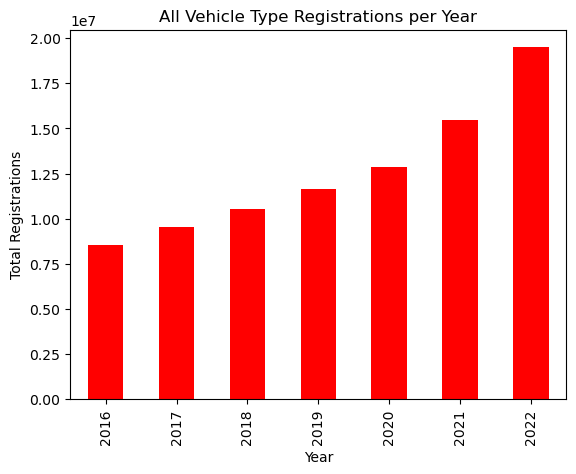

In [12]:

bar_chart = ev_sum.plot.bar(color='r')
plt.xlabel("Year")
plt.ylabel("Total Registrations")
plt.title("All Vehicle Type Registrations per Year")
plt.show()

- (Above bar plot) Clear growth in the demand slope YoY

In [13]:
#Gas/Diesel bar plot showing the total number of rows using pyplot.
gas_sum = reduced_registration_data_df["Total Gasoline/Diesel Registrations"].groupby(reduced_registration_data_df["Year"]).sum()
gas_mean = reduced_registration_data_df["Total Gasoline/Diesel Registrations"].groupby(reduced_registration_data_df["Year"]).mean()
gas_median = reduced_registration_data_df["Total Gasoline/Diesel Registrations"].groupby(reduced_registration_data_df["Year"]).median()
gas_var = reduced_registration_data_df["Total Gasoline/Diesel Registrations"].groupby(reduced_registration_data_df["Year"]).var()
gas_std = reduced_registration_data_df["Total Gasoline/Diesel Registrations"].groupby(reduced_registration_data_df["Year"]).std()
gas_sem = reduced_registration_data_df["Total Gasoline/Diesel Registrations"].groupby(reduced_registration_data_df["Year"]).sem()


gas_stat_summary = pd.DataFrame({
                             "Sum of Gas/Diesel Registration" : gas_sum,
                             "Mean of Gas/Diesel Registrations" : gas_mean,
                             "Median of Gas/Diesel Registrations" : gas_median,
                             "Var of Gas/Diesel Registrations" : gas_var,
                             "Std.Dev Gas/Diesel EV Registrations" : gas_std,
                             "Std. Gas/Diesel of EV Registrations" : gas_sem})

# to view the statistical values of numerical columns
gas_stat_summary

,Sum of Gas/Diesel Registration,Mean of Gas/Diesel Registrations,Median of Gas/Diesel Registrations,Var of Gas/Diesel Registrations,Std.Dev Gas/Diesel EV Registrations,Std. Gas/Diesel of EV Registrations
Year,,,,,,
2016,465178200,8.945735e+06,3424750.0,1.024185e+15,3.200289e+07,4.438003e+06
2017,471063000,9.058904e+06,3426750.0,1.050697e+15,3.241445e+07,4.495075e+06
2018,474707800,9.128996e+06,3423850.0,1.067356e+15,3.267041e+07,4.530571e+06
2019,479819400,9.227296e+06,3427050.0,1.091099e+15,3.303178e+07,4.580684e+06
2020,481705400,9.263565e+06,3365950.0,1.100255e+15,3.317009e+07,4.599863e+06
2021,495619600,9.531146e+06,3558650.0,1.164640e+15,3.412682e+07,4.732539e+06
2022,497059600,9.558838e+06,3585100.0,1.172183e+15,3.423715e+07,4.747839e+06


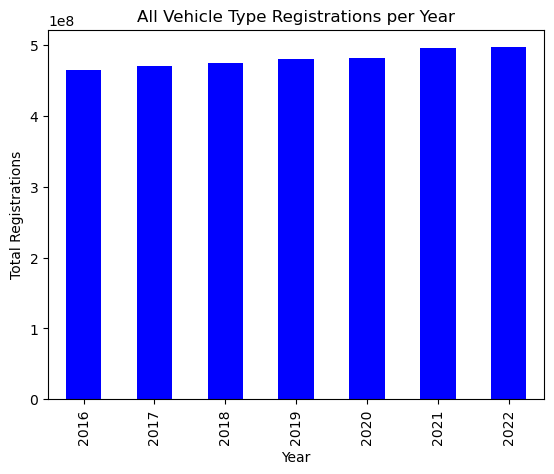

In [14]:
bar_chart = gas_sum.plot.bar(color='b')
plt.xlabel("Year")
plt.ylabel("Total Registrations")
plt.title("All Vehicle Type Registrations per Year")
plt.show()

- (Above bar plot) Some growth in the demand slope YoY

## Narrowing down into sub categories
Breaking down the types of vehicles to compare against; electic vehicles ((EV, HEV, PHEV) v. (Gasoline, Diesel)), year and state

In [15]:
ev_sum.head()

Year
2016     8551800
2017     9515400
2018    10552600
2019    11666200
2020    12854000
Name: Total EV Registrations, dtype: int64

In [16]:
# EV sum diff YoY
ev_sum_diff = np.diff(np.array(ev_sum))
ev_sum_diff_perc = ev_sum_diff / np.array(ev_sum)[:-1] * 100
ev_sum_diff_perc


array([11.26780327, 10.9002249 , 10.55284953, 10.18155012, 20.32052279,
       26.03776025])

In [17]:
gas_sum.head()

Year
2016    465178200
2017    471063000
2018    474707800
2019    479819400
2020    481705400
Name: Total Gasoline/Diesel Registrations, dtype: int64

In [18]:
# Fossil fuel sum diff YoY
gas_sum_diff = np.diff(np.array(gas_sum))
gas_sum_diff_perc = gas_sum_diff / np.array(gas_sum)[:-1] * 100
gas_sum_diff_perc

array([1.26506358, 0.77373939, 1.07678871, 0.39306456, 2.88852896,
       0.29054541])

In [19]:
ev_sum_regis_break = reduced_registration_data_df.groupby('Year').sum()
ev_sum_regis_break

,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Gasoline,Diesel,Total Registrations,Total EV Registrations,Total Gasoline/Diesel Registrations,EV Registration Rate %,Gas/Diesel Registration Rate %
Year,,,,,,,,,,
2016,560600,508000,7483200,449710200,15468000,525559432,8551800,465178200,72.394871,4571.595337
2017,754200,689200,8072000,454831400,16231600,536811884,9515400,471063000,78.677410,4531.776774
2018,1145200,922600,8484800,458148200,16559600,544517136,10552600,474707800,85.224569,4502.447149
2019,1567200,1073200,9025800,462717600,17101800,553022788,11666200,479819400,92.625616,4481.394039
2020,2037800,1188800,9627400,463984400,17721000,556703440,12854000,481705400,101.999597,4468.469454
2021,2908800,1573600,10983600,481399000,14220600,561869492,15466000,495619600,122.906139,4558.898790
2022,4884600,2024800,12583600,482745800,14313800,567123144,19493000,497059600,153.238716,4533.273076


In [20]:
ev_sum_regis_break['Electric (EV)']

Year
2016     560600
2017     754200
2018    1145200
2019    1567200
2020    2037800
2021    2908800
2022    4884600
Name: Electric (EV), dtype: int64

In [21]:
ev_sum_regis_break['Plug-In Hybrid Electric (PHEV)']

Year
2016     508000
2017     689200
2018     922600
2019    1073200
2020    1188800
2021    1573600
2022    2024800
Name: Plug-In Hybrid Electric (PHEV), dtype: int64

In [22]:
ev_sum_regis_break['Hybrid Electric (HEV)']

Year
2016     7483200
2017     8072000
2018     8484800
2019     9025800
2020     9627400
2021    10983600
2022    12583600
Name: Hybrid Electric (HEV), dtype: int64

In [23]:
# Year, ranges list
year = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
avg_range = [145,151, 189, 209, 210, 217, 276]
max_range = [315, 335, 335, 370, 402, 520, 520]
avg_range_df = pd.DataFrame({
                             "Year" : year,
                             "Average Range" : avg_range,
                             "Maximum Range" : max_range})

range_yoy = np.diff(np.array(avg_range_df['Average Range']))/np.array(avg_range_df['Average Range'])[:-1] * 100
max_yoy = np.diff(np.array(avg_range_df['Maximum Range']))/np.array(avg_range_df['Maximum Range'])[:-1] * 100
ev_yoy = np.diff(np.array(ev_sum_regis_break['Electric (EV)']))/np.array(ev_sum_regis_break['Electric (EV)'])[:-1] * 100
plugin_yoy = np.diff(np.array(ev_sum_regis_break['Plug-In Hybrid Electric (PHEV)']))/np.array(ev_sum_regis_break['Plug-In Hybrid Electric (PHEV)'])[:-1] * 100
hybrid_yoy = np.diff(np.array(ev_sum_regis_break['Hybrid Electric (HEV)']))/np.array(ev_sum_regis_break['Hybrid Electric (HEV)'])[:-1] * 100

year_range_df = pd.DataFrame({
                             "Year" : ['2016-2017','2017-2018','2018-2019','2019-2020','2020-2021','2021-2022'],
                             "Average Range" : range_yoy,
                             "Maximum Range" : max_yoy,
                             "EV YoY Growth" : ev_yoy,
                             "Plug-In YoY Growth" : plugin_yoy,
                             "Hybrid YoY Growth" : hybrid_yoy
                        
                            })
year_range_df

,Year,Average Range,Maximum Range,EV YoY Growth,Plug-In YoY Growth,Hybrid YoY Growth
0,2016-2017,4.137931,6.349206,34.534427,35.669291,7.868292
1,2017-2018,25.165563,0.000000,51.843012,33.865351,5.113974
2,2018-2019,10.582011,10.447761,36.849459,16.323434,6.376108
3,2019-2020,0.478469,8.648649,30.028076,10.771524,6.665337
4,2020-2021,3.333333,29.353234,42.742173,32.368775,14.086877
5,2021-2022,27.188940,0.000000,67.924917,28.673106,14.567173


In [24]:
year_range_df.set_index("Year")

,Average Range,Maximum Range,EV YoY Growth,Plug-In YoY Growth,Hybrid YoY Growth
Year,,,,,
2016-2017,4.137931,6.349206,34.534427,35.669291,7.868292
2017-2018,25.165563,0.000000,51.843012,33.865351,5.113974
2018-2019,10.582011,10.447761,36.849459,16.323434,6.376108
2019-2020,0.478469,8.648649,30.028076,10.771524,6.665337
2020-2021,3.333333,29.353234,42.742173,32.368775,14.086877
2021-2022,27.188940,0.000000,67.924917,28.673106,14.567173


In [25]:
ev_sum_regis_merged = ev_sum_regis_break.merge(avg_range_df, on='Year')
ev_sum_regis_merged

,Year,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Gasoline,Diesel,Total Registrations,Total EV Registrations,Total Gasoline/Diesel Registrations,EV Registration Rate %,Gas/Diesel Registration Rate %,Average Range,Maximum Range
0,2016,560600,508000,7483200,449710200,15468000,525559432,8551800,465178200,72.394871,4571.595337,145,315
1,2017,754200,689200,8072000,454831400,16231600,536811884,9515400,471063000,78.677410,4531.776774,151,335
2,2018,1145200,922600,8484800,458148200,16559600,544517136,10552600,474707800,85.224569,4502.447149,189,335
3,2019,1567200,1073200,9025800,462717600,17101800,553022788,11666200,479819400,92.625616,4481.394039,209,370
4,2020,2037800,1188800,9627400,463984400,17721000,556703440,12854000,481705400,101.999597,4468.469454,210,402
5,2021,2908800,1573600,10983600,481399000,14220600,561869492,15466000,495619600,122.906139,4558.898790,217,520
6,2022,4884600,2024800,12583600,482745800,14313800,567123144,19493000,497059600,153.238716,4533.273076,276,520


## Narrowing down another level by state of California

California has the most registered EVs in the country therefore it was decided to breakdown the dataset to further illustrate

In [26]:
# Reduced to 2022
ev_sum_regis_merged_2022 = reduced_registration_data_df[reduced_registration_data_df["Year"] == 2022]
ev_sum_regis_merged_2022.head()

,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Gasoline,Diesel,Total Registrations,Total EV Registrations,Total Gasoline/Diesel Registrations,EV Registration Rate %,Gas/Diesel Registration Rate %
0,2022,Alabama,8700,4400,50800,4077100,126100,4797522,63900,4203200,1.331938,87.611896
1,2022,Alaska,2000,700,9000,457100,30500,564122,11700,487600,2.074019,86.435204
2,2022,Arizona,65800,20400,150800,5476100,198700,6492522,237000,5674800,3.650353,87.405172
3,2022,Arkansas,5100,2500,30600,2229500,89700,2687422,38200,2319200,1.421437,86.298319
4,2022,California,903600,361100,1514000,31059000,725300,36121822,2778700,31784300,7.692580,87.991962


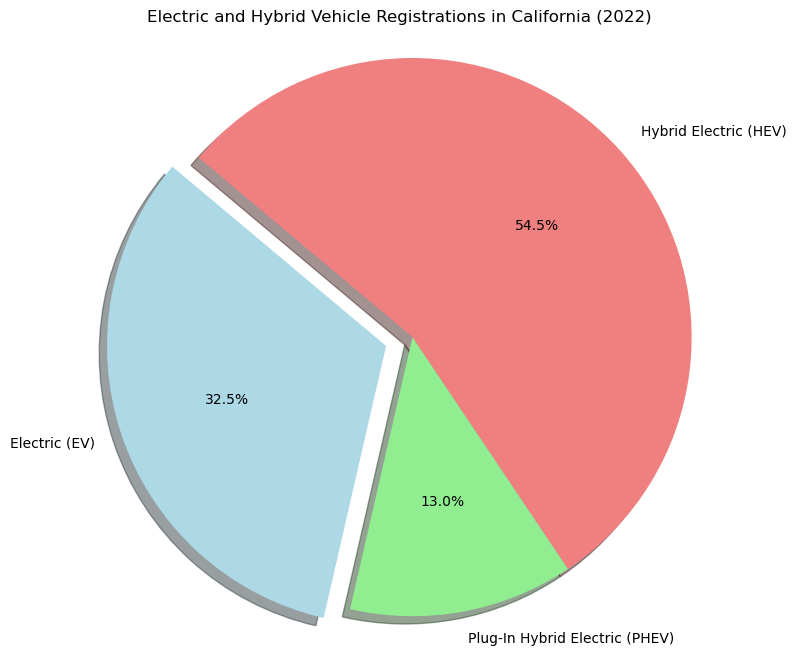

In [27]:
# Add pyplot
california_2022 = reduced_registration_data_df[(reduced_registration_data_df["State"] == "California") & (reduced_registration_data_df["Year"] == 2022)]

# Data
labels = ['Electric (EV)', 'Plug-In Hybrid Electric (PHEV)', 'Hybrid Electric (HEV)']
sizes = [903600, 361100, 1514000]
colors = ['lightblue', 'lightgreen', 'lightcoral']
explode = (0.1, 0, 0)  # Explode the first slice (Electric (EV))

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Electric and Hybrid Vehicle Registrations in California (2022)')
plt.show()

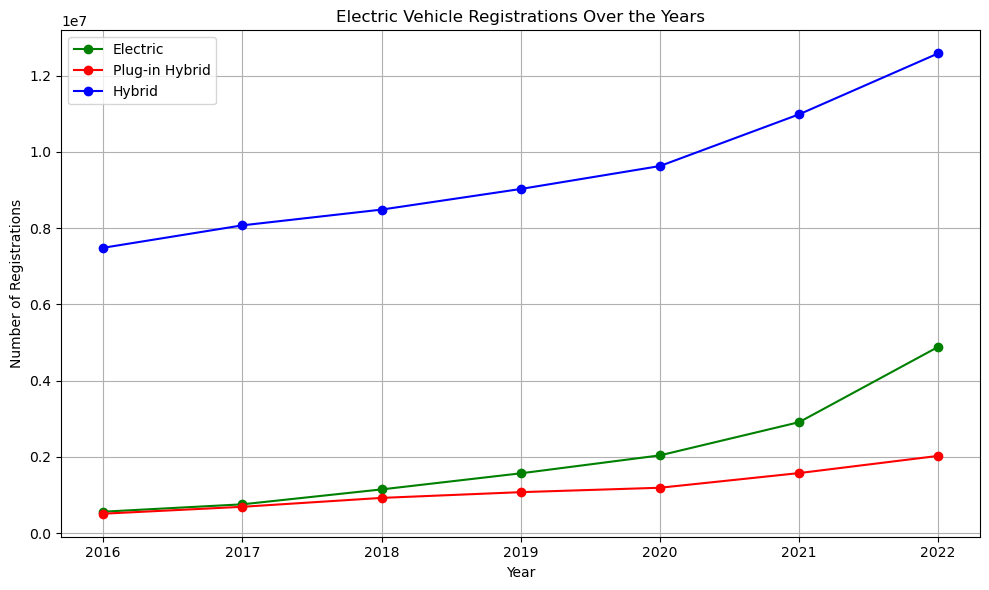

In [28]:
# Add pyplot
ev_registrations = reduced_registration_data_df.groupby('Year')['Electric (EV)'].sum()
phev_registrations = reduced_registration_data_df.groupby('Year')['Plug-In Hybrid Electric (PHEV)'].sum()
hev_registrations = reduced_registration_data_df.groupby('Year')['Hybrid Electric (HEV)'].sum()

plt.figure(figsize=(10, 6))
plt.plot(ev_registrations.index, ev_registrations.values, marker='o', color='green',label='Electric')
plt.plot(phev_registrations.index, phev_registrations.values, marker='o', color='red',label= 'Plug-in Hybrid')
plt.plot(hev_registrations.index, hev_registrations.values, marker='o', color='blue',label='Hybrid')
plt.plot

plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.title('Electric Vehicle Registrations Over the Years')
plt.grid(True)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [29]:
# Calculate the percentage change in EV registrations year-on-year
percentage_change_ev = np.diff(np.array(ev_sum_regis_break['Electric (EV)']))/np.array(ev_sum_regis_break['Electric (EV)'])[:-1] * 100
percentage_change_ev

array([34.5344274 , 51.84301246, 36.84945861, 30.02807555, 42.74217293,
       67.92491749])

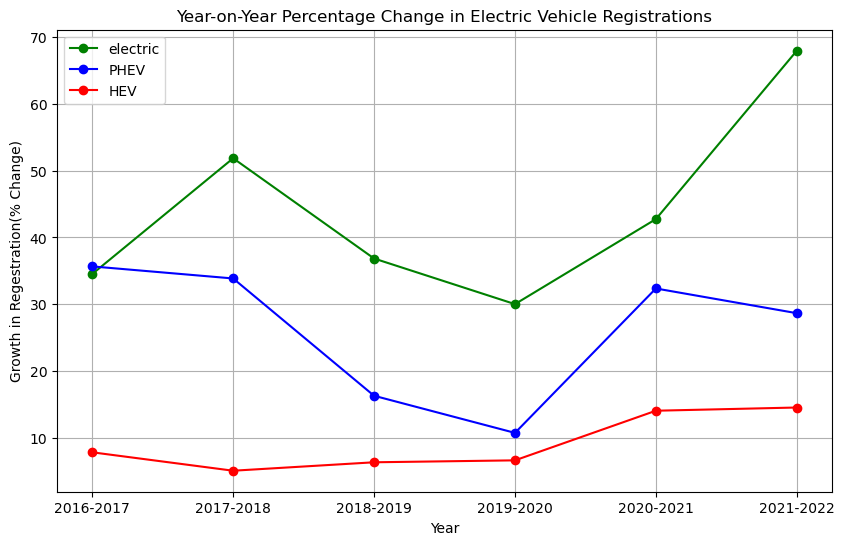

In [30]:
#calculating percent change of different types of vehicle registrations (Electric, Plug-In Hybrid Electric - PHEV, and Hybrid Electric - HEV) over the years
percentage_change_ev = np.diff(np.array(ev_sum_regis_break['Electric (EV)'])) / np.array(ev_sum_regis_break['Electric (EV)'])[:-1] * 100
percentage_change_plug_in = np.diff(np.array(ev_sum_regis_break['Plug-In Hybrid Electric (PHEV)'])) / np.array(ev_sum_regis_break['Plug-In Hybrid Electric (PHEV)'])[:-1] * 100
percentage_change_hybrid = np.diff(np.array(ev_sum_regis_break['Hybrid Electric (HEV)'])) / np.array(ev_sum_regis_break['Hybrid Electric (HEV)'])[:-1] * 100

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(year_range_df['Year'], percentage_change_ev, marker='o', color='green',label='electric')   #selecting the index values (years) of the df ev_sum_regis_break starting from the second year (index 1) onward.
plt.plot(year_range_df['Year'], percentage_change_plug_in, marker='o', color='blue',label='PHEV')   #This is done to exclude the first year because the percentage change calculation involves differences between consecutive years.
plt.plot(year_range_df['Year'], percentage_change_hybrid, marker='o', color='red',label='HEV')

plt.xlabel('Year')
plt.ylabel('Growth in Regestration(% Change)')
plt.title('Year-on-Year Percentage Change in Electric Vehicle Registrations')
plt.grid(True)
plt.legend()
plt.show()


- Clear visualization of exponential growth in BEV specific category

In [31]:
#  2016 - 2022 Narrowing down to highest registration count of EVs
ev_sum_state = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["State"]).sum()
ev_sum_state.sort_values(inplace=True, ascending=False)
ev_sum_state

State
United States           44049500
California              12871000
Texas                    2342500
Florida                  2341900
Washington               1849200
New York                 1809100
Illinois                 1561000
Virginia                 1306300
Pennsylvania             1171900
North Carolina           1105800
Massachusetts            1081700
Arizona                  1048000
New Jersey               1027700
Georgia                  1012500
Ohio                     1002300
Oregon                    971400
Maryland                  960700
Colorado                  916000
Michigan                  803400
Missouri                  679700
Minnesota                 664700
Wisconsin                 641700
Indiana                   595600
Tennessee                 554700
Connecticut               457700
Utah                      443500
Nevada                    403300
South Carolina            399700
Kentucky                  317700
Alabama                   290800
Okla

## 2022 Make and model, including MSRP & Range

In [32]:
ev_price_df = pd.read_csv(EV_Prices).dropna(how = 'all')
ev_price_df

,Brand,Model,MSRP,Dest Chrg,Tax Credit (kWh),After Tax,Range,Type
0,Lucid,"Air Dream Edition Range 19"" (2022)","169,000","1,500","7,500","163,000",520.0,EV
1,Lucid,"Air Grand Touring 19"" (2022)","139,000","1,500","7,500","133,000",516.0,EV
2,Lucid,"Air Dream Edition Range 21"" (2022)","169,000","1,500","7,500","163,000",481.0,EV
3,Lucid,"Air Dream Edition Performance 19"" (202.2)","169,000","1,500","7,500","163,000",471.0,EV
4,Lucid,"Air Grand Touring 21"" (2022)","139,000","1,500","7,500","133,000",469.0,EV
...,...,...,...,...,...,...,...,...
145,Volvo,2022 Volvo XC60 T8 Twin Engine,"53,500","1,095","5,419","49,176",NaN,PHEV
146,Volvo,2022 Volvo XC90 T8 Twin Engine,"63,450","1,095","5,419","59,126",NaN,PHEV
147,Volvo,2022 Volvo V60 T8 Twin Engine Polestar,"67,550","1,095","5,419","63,226",NaN,PHEV
148,Volvo,2022 Volvo XC60 T8 Twin Engine,"53,500","1,095","5,419","49,176",NaN,PHEV


In [33]:
ev_price_df['Range'].dtype     #kept getting error.so checked the data type of "Range" column
                               #outcomr type'O' represents it has mixed data types. 

dtype('float64')

In [34]:
# # Decided to convert 'Range' column to numeric, coercing non-numeric values to NaN:from google
# ev_price_df['Range'] = pd.to_numeric(ev_price_df['Range'], errors='coerce')
ev_price_df['MSRP'] = [''.join(i.split(',')) for i in ev_price_df['MSRP']]

ev_price_df['Range'] = ev_price_df['Range'].astype('float64')
ev_price_df['MSRP'] = ev_price_df['MSRP'].astype('float64')



#used Groupby to calculate the mean range for each brand
brand_avg_range = ev_price_df.groupby('Brand').mean()
brand_avg_range

,MSRP,Range
Brand,,
Audi,77423.076923,220.727273
BMW,58687.500000,298.333333
Cadillac,58795.000000,300.000000
Chevrolet,32000.000000,253.000000
Chrysler,46760.000000,NaN
Ford,57071.555556,267.529412
GMC,110295.000000,329.000000
Honda,33400.000000,NaN
Hyundai,42931.363636,258.333333


In [35]:

# Sorted the brands in descending(high to low) order
sorted_brands = brand_avg_range.sort_values('Range',ascending=False)

# Select the top 10 brands with the highest average range
top_10_high_range_brands = sorted_brands.head(10)
top_10_high_range_brands


,MSRP,Range
Brand,,
Lucid,159000.000000,484.666667
Mercedes,110710.000000,345.000000
Tesla,85677.500000,334.062500
GMC,110295.000000,329.000000
Rivian,68750.000000,315.000000
Cadillac,58795.000000,300.000000
BMW,58687.500000,298.333333
Kia,46552.222222,272.000000
Ford,57071.555556,267.529412


In [36]:
# Converted the 'Range' column to numeric, handling errors
# ev_price_df.loc['MSRP'] = pd.to_numeric(ev_price_df['MSRP'], errors='coerce')

#used Groupby to calculate the mean range for each brand
brand_avg_msrp = ev_price_df.groupby('Brand')['MSRP'].mean()
brand_avg_msrp

Brand
Audi           77423.076923
BMW            58687.500000
Cadillac       58795.000000
Chevrolet      32000.000000
Chrysler       46760.000000
Ford           57071.555556
GMC           110295.000000
Honda          33400.000000
Hyundai        42931.363636
Jaguar         69900.000000
Jeep           52530.000000
Kia            46552.222222
Land           90000.000000
Lincoln        59375.000000
Lucid         159000.000000
MINI           35700.000000
Mazda          33470.000000
Mercedes      110710.000000
Mitsubishi     36695.000000
Nissan         43500.000000
Polestar       83600.000000
Porsche       128660.526316
Rivian         68750.000000
Subaru         35645.000000
Tesla          85677.500000
Toyota         33285.000000
Volkswagen     44850.000000
Volvo          59075.000000
Name: MSRP, dtype: float64

In [37]:

# Sort the brands  in descending order
sorted_brands = brand_avg_msrp.sort_values(ascending=False)

# Select the top 10 brands with the highest average range
top_10_high_msrp_brands = sorted_brands.head(10)
top_10_high_msrp_brands

Brand
Lucid       159000.000000
Porsche     128660.526316
Mercedes    110710.000000
GMC         110295.000000
Land         90000.000000
Tesla        85677.500000
Polestar     83600.000000
Audi         77423.076923
Jaguar       69900.000000
Rivian       68750.000000
Name: MSRP, dtype: float64

PearsonRResult(statistic=0.8805019011691155, pvalue=0.000770450745064012)


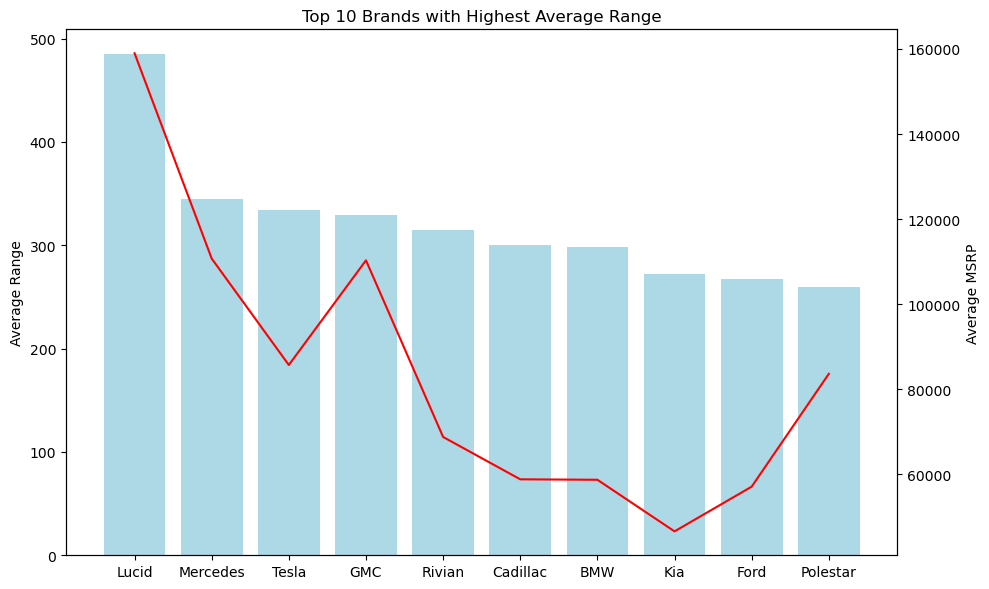

In [38]:
plt.figure(figsize=(10, 6))
# top_10_high_range_brands.plot(y = 'Range',kind='bar', color='lightblue')
plt.bar(top_10_high_range_brands.index,top_10_high_range_brands['Range'], color='lightblue')
plt.ylabel('Average Range')
plt.twinx()
plt.plot(top_10_high_range_brands.index,top_10_high_range_brands['MSRP'], color='red')
plt.title('Top 10 Brands with Highest Average Range')
plt.xlabel('Brand')
plt.ylabel('Average MSRP')
plt.xticks(rotation=45,)
plt.tight_layout()
print(st.pearsonr(top_10_high_range_brands['MSRP'],top_10_high_range_brands['Range']))
plt.show()

- EV cost to range seems to be a contributing factor to the growth in EV registrations

In [39]:
## dictionary of state abbr to state for referencing etc.
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

In [40]:
location_df  = pd.read_csv(fuel_stations)

location_df = location_df.loc[location_df['State'].dropna().index] ### drop missing entries only in State column
drop_state = [i for i in location_df['State'].unique() if i not in states.keys()] ### get list of states to drop using state dictionary
for st in drop_state:
    location_df.drop(location_df[location_df['State'] == st].index,inplace = True)

lats = location_df.groupby('State').mean()['Latitude']
long = location_df.groupby('State').mean()['Longitude']
count = location_df.groupby('State').count()['Fuel Type Code']

map_df = pd.DataFrame([count,long,lats]).T.reset_index() ## T transposes dataframe, switches columns and index values
map_df = map_df.rename(columns = {'Fuel Type Code':'Count','State':'State Abbr'})
## Set Index to match registration df
map_df['State'] = [states[i] for i in map_df['State Abbr']]

colors = 'State'
size = 'Count'
xlab = 'x'
ylab = 'y'
fh = 500
fw = 700
map_df.hvplot.points(x='Longitude',y='Latitude',geo = True,xlabel=xlab,ylabel = ylab,c= colors,s = size,frame_height = fh,frame_width=fw,alpha = 0.75,tiles='StamenTonerBackground',scale = 0.5)


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (State,Count)

The r is: 0.9801928736245888


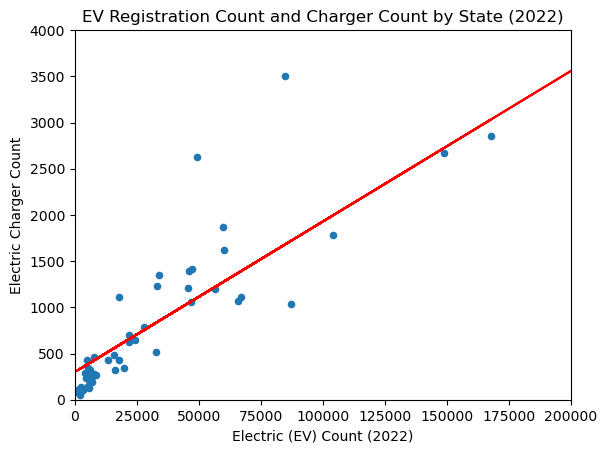

In [41]:
## Filter for only 2022 registration numbers and merge with map df
agg_data = reduced_registration_data_df[reduced_registration_data_df['Year'] == 2022]
agg_data = agg_data.merge(map_df,on='State')

## Calculate Correlation
x = np.array(agg_data['Electric (EV)'])
y = np.array(agg_data['Count'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = np.array(x) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

## Plot EV Registration Count and Charger Count
agg_data.plot(kind='scatter',x='Electric (EV)',y = 'Count')
plt.plot(x,regress_values,"r-")
plt.xlabel('Electric (EV) Count (2022)')
plt.ylabel('Electric Charger Count')
plt.title('EV Registration Count and Charger Count by State (2022)')
print(f"The r is: {rvalue}")
plt.ylim(0,4000)
plt.xlim(0,0.2*1000000)
plt.show()

- California has a far greater number of ev car registrations and ev chargers. The scatter plot is zoomed in to clearly show the correlation among the 49 remaining states.

In [42]:
## Load in zipcodes and filter for CA
zipcodes = pd.read_csv(zipcodes)
ca_zip = zipcodes[zipcodes['state']=='CA']
ca_zip.rename(columns = {'zip':'ZIP'},inplace = True)

## Filter out chargers for CA
ca_df = location_df[location_df['State'] == 'CA']
ca_df = ca_df.merge(ca_zip[['ZIP','county']],on = 'ZIP')
ca_zip_loc = pd.DataFrame(ca_zip.groupby('county').mean()[['latitude','longitude']])

colors = 'county'
xlab = 'x'
ylab = 'y'
fh = 500
fw = 700

ca_df.hvplot.points(x='Longitude',y='Latitude',geo = True,xlabel=xlab,ylabel = ylab,c= colors,frame_height = fh,frame_width=fw,alpha = 0.75,tiles='EsriStreet')

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (county)

In [43]:
## Merge Zip code location and counts 
county_cnt = pd.DataFrame(ca_df.groupby('county').count()['State'])
county_df = county_cnt.merge(ca_zip_loc,on='county').reset_index().rename(columns={'State':'Charger Count'})
colors = 'county'
size = 'Charger Count'
xlab = 'x'
ylab = 'y'
fh = 500
fw = 700

county_df.hvplot.points(x='longitude',y='latitude',geo = True,xlabel=xlab,ylabel = ylab,c= colors,s = size,frame_height = fh,frame_width=fw,alpha = 0.75,tiles='EsriStreet')


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (county,Charger Count)

In [44]:
## Used to calculate median distance


# from math import sin, cos, sqrt, atan2, radians

# def find_dist(lat1,lon1,lat2,lon2):
#     # Approximate radius of earth in miles
#     R= 3963.19

#     dlat = radians(abs(lat2 - lat1))
#     dlon = radians(abs(lon2 - lon1))
#     lat1 = radians(abs(lat1))
#     lat2 = radians(abs(lat2))

#     a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
#     c = 2 * atan2(sqrt(a), sqrt(1 - a))
#     return R *c

## Get list of distance from charger for each state calculate median (account for skew)
# dist_mean = {}
# dist_median = {}
# for i in location_df['State'].unique():
#     state_df = location_df[location_df['State'] == i]
#     dist_list = []
#     for x1,y1 in zip(state_df['Latitude'],state_df['Longitude']):
#         dist = 100000
#         for x2,y2 in zip(state_df['Latitude'],state_df['Longitude']):
#             pos_dist = find_dist(x1,y1,x2,y2)
#             if pos_dist < dist and x1 != x2 and y1 != y2:
#                 dist = pos_dist
#         dist_list.append(dist)
#     dist_mean[i] = np.mean(dist_list)
#     dist_median[i] = np.median(dist_list)
# mean_df = pd.DataFrame({'State Abbr':dist_mean.keys(),'Mean Charger Distance':dist_mean.values()})
# median_df = pd.DataFrame({'State Abbr':dist_median.keys(),'Mean Charger Distance':dist_median.values()})
# dist_df = mean_df.merge(median_df,on='State Abbr')
# dist_df.to_csv('..\charger_distance.csv',index = False)

The r is: -0.36339267076981246


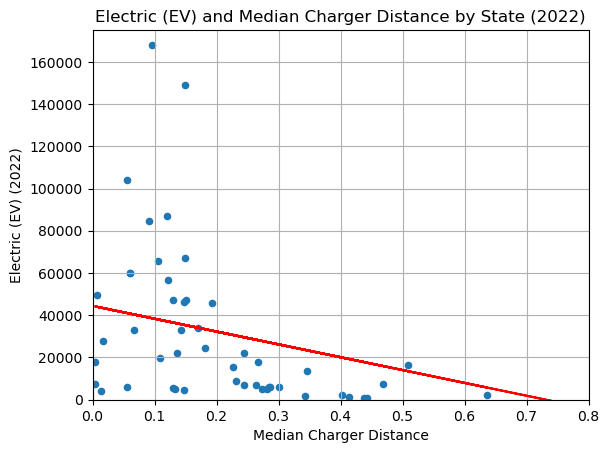

In [45]:
## read in median distances csv
dist_df = pd.read_csv('../Registration_Files/median_charger_distance.csv')
full_df = agg_data.merge(dist_df,on='State Abbr')

## Remove California (outlier)
full_df=full_df[full_df['State'] != 'California']

ycat = 'Electric (EV)'
xcat = 'Median Charger Distance' # can change to "Mean Charger Distance"
# plot ev registration and charger distance
full_df.plot(kind='scatter',y= ycat,x = xcat)
y = np.array(full_df[ycat])
x = np.array(full_df[xcat])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = np.array(x) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.ylabel(ycat+ ' (2022)')
plt.xlabel(xcat)
plt.title(f'{ycat} and {xcat} by State (2022)')
plt.grid()
plt.ylim(0,175000)
plt.xlim(0,0.8) # (0,8) if using mean
print(f"The r is: {rvalue}")
plt.show()

In [46]:
# on buying behavior 

cost_per100_df = pd.read_csv('../Registration_Files/Cost_Per100.csv')



In [47]:
###  Carl added:


# on buying behavior --

# CSV file "Cost_Per100" means comparison of EV to ICE vehicle, how many miles per $100 does each go. Speaks to cost of ownership, true cost of day to day use. 
#Source of data:  https://electrek.co/2021/07/27/ev-vs-ice-how-far-can-you-travel-in-each-state-for-100/

#Key fields are "State", "Miles per $100 (Gas)", "Miles per $100 (EV Home Chrg)", "Miles per $100 (EV Fast Chrg)"

#Datasource took best selling comparable vehicles to compare (EV = Tesla Std range Model 3, 50kWh battery, VS ICE = Toyota Rav 4).
#Per state, took avg gal of gas cost (2021), avg home charge rates (meaning 85% efficiency charger), and avg commercial charge rates (95% efficiency). 
#For simplicity, did not factor in daily fluctuations in electric rates, time of use, type of driving, etc.

cost_per100_df.head()

,State,Avg Cost Gal of Gas,Gal per $100 (Gas),Miles per $100 (Gas),Avg Home Elec Cost (EV Home Chrg),Cost to Charge (EV Home Chrg),Cost per mile (EV Home Chrg),Miles per $100 (EV Home Chrg),Avg Comm Elec Cost (EV Fast Chrg),Cost to Charge (EV Fast Chrg),Cost per mile (EV Fast Chrg),Miles per $100 (EV Fast Chrg)
0,Alabama,2.83,35.32,1059.6,0.14,7.94,0.03,3333.3,0.22,11.68,0.04,2272.7
1,Alaska,3.64,27.48,824.4,0.23,13.59,0.05,1923.1,0.31,16.32,0.06,1612.9
2,Arizona,3.12,32.04,961.2,0.13,7.71,0.03,3448.3,0.21,10.95,0.04,2381.0
3,Arkansas,2.85,35.08,1052.4,0.11,6.59,0.03,4000.0,0.19,10.00,0.04,2631.6
4,California,4.33,23.09,692.7,0.23,13.41,0.05,1960.8,0.28,14.58,0.06,1818.2


In [48]:
###  Carl Added


cost_per100_toplot_df = cost_per100_df[[
                                        "State",
                                        "Miles per $100 (Gas)",
                                        "Miles per $100 (EV Home Chrg)",
                                        "Miles per $100 (EV Fast Chrg)"
                                        ]]
cost_per100_toplot_df = cost_per100_toplot_df.sort_values("Miles per $100 (EV Home Chrg)", ascending=False).reset_index(drop=True)
cost_per100_toplot_df.head()


,State,Miles per $100 (Gas),Miles per $100 (EV Home Chrg),Miles per $100 (EV Fast Chrg)
0,Washington,781.8,4347.8,2631.6
1,Idaho,800.1,4347.8,2777.8
2,Utah,774.9,4347.8,2702.7
3,Oklahoma,1050.9,4166.7,2777.8
4,Montana,934.2,4000.0,2439.0


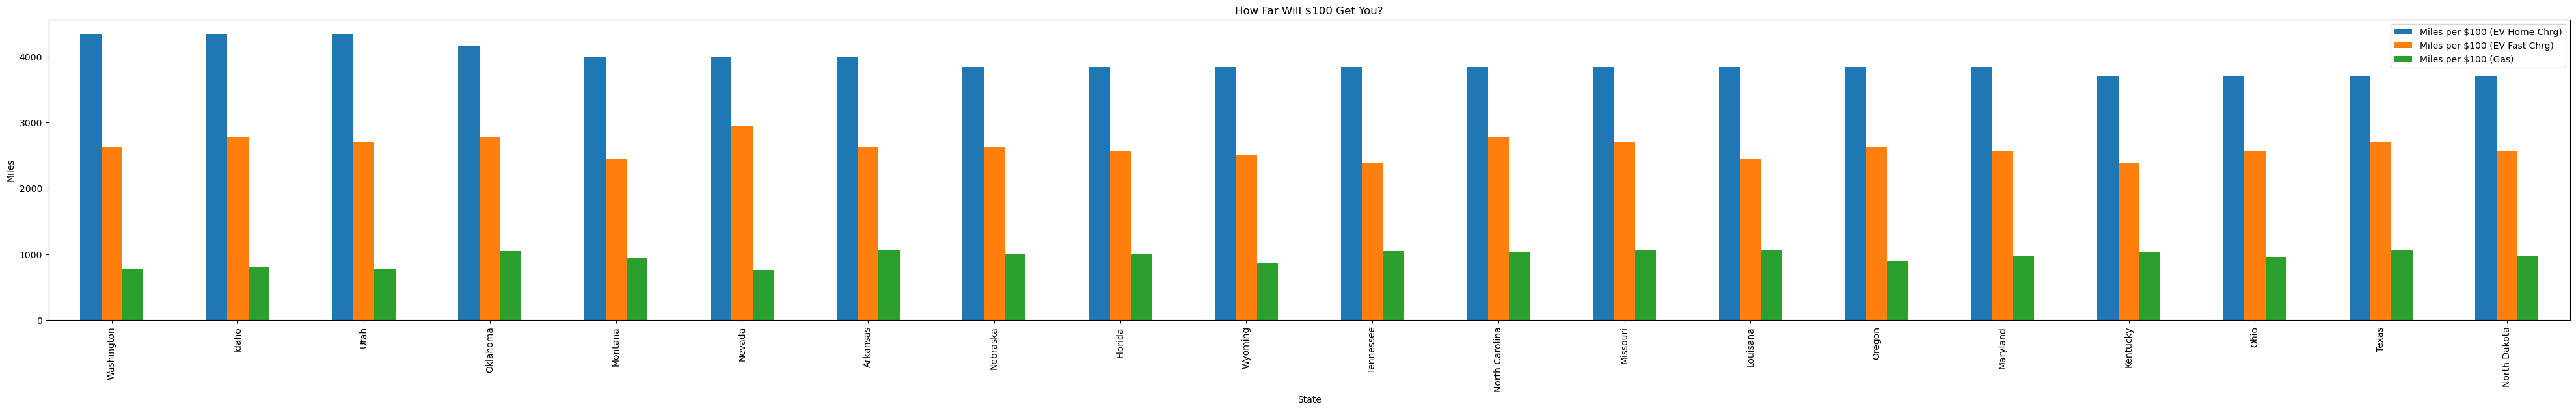

In [49]:
###  Carl Added

# plt.figure()
cost_per100_toplot_df.iloc[:20].plot(x ="State", y = ["Miles per $100 (EV Home Chrg)", 
                                            "Miles per $100 (EV Fast Chrg)", 
                                            "Miles per $100 (Gas)"
                                            ],
                                            figsize=(50,6), kind = "bar")

plt.xlabel("State")
plt.ylabel("Miles")
plt.title("How Far Will $100 Get You?")
# plt.tight_layout()
plt.show()

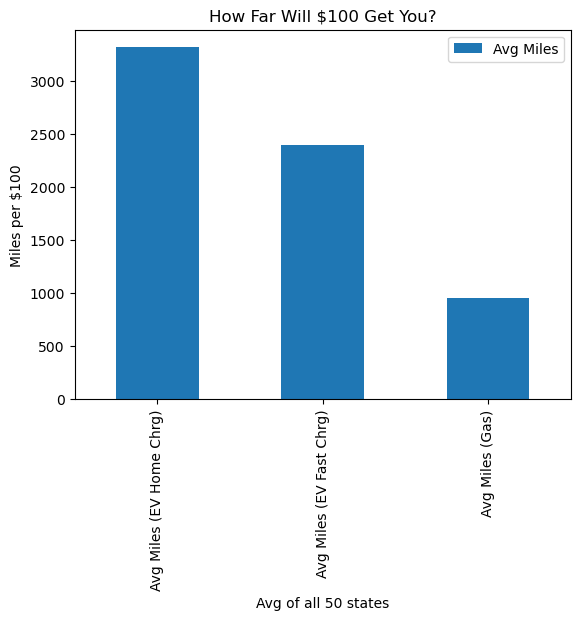

In [50]:
# For simple chart, avg of all "Cost per $100" to plot
gas_100 = cost_per100_toplot_df["Miles per $100 (Gas)"].mean()
EVhome_100 = cost_per100_toplot_df["Miles per $100 (EV Home Chrg)"].mean()
EVcomm_100 = cost_per100_toplot_df["Miles per $100 (EV Fast Chrg)"].mean()

miles_per_100_df = pd.DataFrame({
                                "Category" : ['Avg Miles (EV Home Chrg)', 'Avg Miles (EV Fast Chrg)', 'Avg Miles (Gas)'],
                                "Avg Miles" : [EVhome_100, EVcomm_100, gas_100]
                                })
miles_per_100_df

miles_per_100_df.plot(x="Category", y= "Avg Miles", kind="bar")
plt.xlabel("Avg of all 50 states")
plt.ylabel("Miles per $100")
plt.title("How Far Will $100 Get You?")
plt.show()


In [51]:
# ploting the top makes using histogram
fig = px.histogram(cost_per100_toplot_df,
                   x='Miles per $100 (Gas)',
                    marginal='box',
                   color_discrete_sequence=['Green'],
                   title='Miles per $100 (Gas)')

fig.update_layout(bargap=0.3)
fig.show()

In [52]:
# ploting the top makes using histogram
fig = px.histogram(cost_per100_toplot_df,
                   x='Miles per $100 (EV Home Chrg)',
                    marginal='box',
                   color_discrete_sequence=['Blue'],
                   title='Miles per $100 (EV Home Chrg)')

fig.update_layout(bargap=0.3)
fig.show()

In [53]:
# ploting the top makes using histogram
fig = px.histogram(cost_per100_toplot_df,
                   x='Miles per $100 (EV Fast Chrg)',
                    marginal='box',
                   color_discrete_sequence=['Orange'],
                   title='Miles per $100 (EV Fast Chrg)')

fig.update_layout(bargap=0.3)
fig.show()

# **Summary**
Here is a brief summary of the process we followed for the Data Analysis of Electric Vehicle and Registration Data.

1. Will have performed below actions on the Data.
*   Load the files using pandas
*   Remediated any missing or incorrect values
2. We have analysed below columns to get meangingful insights out the datasets
*   State
*   Year
*   Electric vehicle utilities
*   No of EV registered per state
*   Electric Range
*   Relationhip between electric eange and base MSRP
4. We have answered below questions to generate insights from the dataset
*   What is the average range improvements by year per electric charge?
*   What is the year on year registration's growth for EV?
*   What is the Top 10 count of registrations per state?
*   What is the EVT Distribution count per state?
*   In which year did EV increase the most?

- The electric vehicle registration dataset contains information on Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs), and Hybrid Electric Vehicles (HEVs) registered through Department of Transportation (DOT).

# **Conclusion**

- California is the top state in EV registrations and number of EV chargers.

- From 2016 to 2022 the no of electric vehicles registrations have increased
    - This rate of increase has been greater than the rate of increase in hybrid and plug-in hybrid vehicles consistently over the past 6 years
    - 2021-2022 saw the greatest increase in year on year change for EV vehicles
    - The increase in EV registration is correlated with number of EV chargers and negatively correlated with median charger distance

# **We have doucumented one of several cost of ownerhship metrics that EVs yield a higher return on investment over fossil fuel vehicles in terms of cost per gallon, per mile.

    


# **References:**

Wikipedia, 2018 - 'https://en.wikipedia.org/wiki/Electric_vehicle'

https://electrek.co/2021/07/27/ev-vs-ice-how-far-can-you-travel-in-each-state-for-100/

https://afdc.energy.gov/vehicle-registration

https://afdc.energy.gov/fuels/electricity_locations.html#/find/nearest?fuel=ELEC

https://elements.visualcapitalist.com/range-of-electric-cars-vs-gas/

https://www.unitedstateszipcodes.org/ca/